In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [16]:
df = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  EPISODE = col_character(),
  TITLE = col_character()
)

See spec(...) for full column specifications.



In [19]:
df %>% head

EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,⋯,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,0
S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0
S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0
S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,⋯,0,1,1,0,0,0,0,0,0,0
S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0
S01E06,"""WINTER MOON""",0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0


In [27]:
df1 = df %>% as_tibble %>% gather(key, value, -'EPISODE', -'TITLE')

In [119]:
plotme = df1 %>% subset(value=='1') %>% mutate(key = fct_infreq(key) %>% fct_lump(10) %>% fct_rev)

In [120]:
plotme %>% head

EPISODE,TITLE,key,value
<chr>,<chr>,<fct>,<dbl>
S17E08,"""VIEW FROM THE PARK""",Other,1
S08E13,"""NORTHERN LIGHTS""",Other,1
S29E12,"""AURORA'S DANCE""",Other,1
S03E11,"""RUSTIC BARN""",Other,1
S05E10,"""THE WINDMILL""",Other,1
S05E13,"""MEADOW STREAM""",Other,1


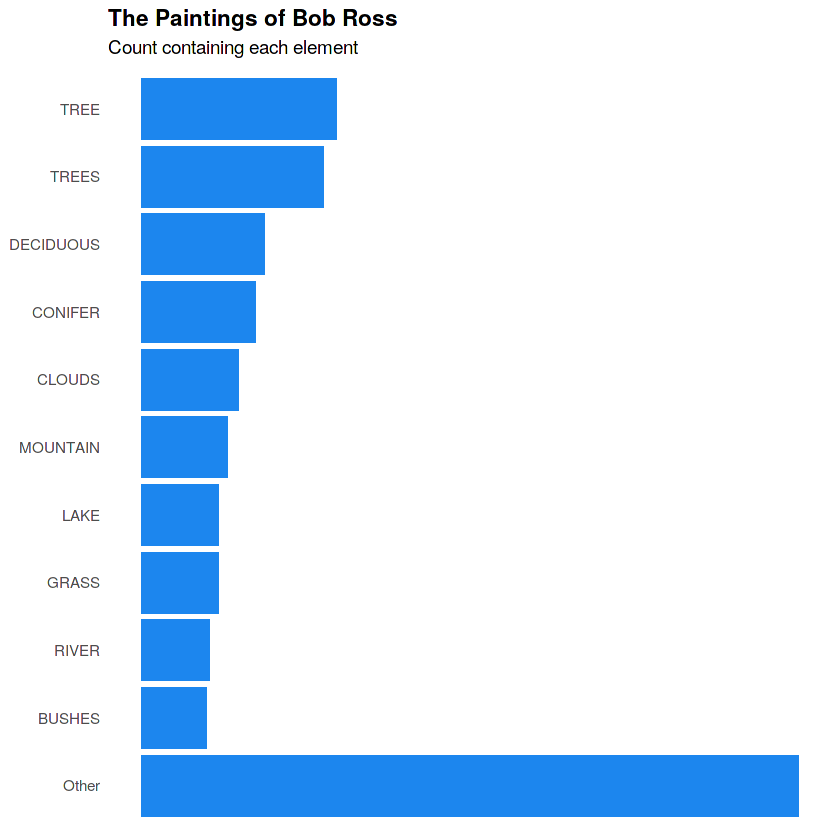

In [205]:
p = ggplot(plotme, aes(x = key)) + geom_bar(fill = 'dodgerblue2')
p = p + labs(title = "The Paintings of Bob Ross", 
        subtitle = "Count containing each element") 
p = p + coord_flip() + theme(plot.title = element_text(face = "bold", hjust = 0),
        plot.subtitle = element_text(hjust = 0),
        axis.text.x=element_blank(),
        axis.ticks=element_blank(),
        panel.background=element_blank(),
        axis.title = element_blank()) 
# p = p + geom_text(y = 'key', label = summarize(count(n)))
p